In [1992]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import Perceptron, LinearRegression, ElasticNet, BayesianRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1993]:
# converts name to GW###### format for visualization purposes
def simplify_name(name):
    if str.startswith(name, "GW"):
        return "GW" + name[2:8]
    return "GW" + name[0:6]

# extracts version number from name
def extract_version(name):
    return name[-1:]

# extracts confidence from catalog.shortName
def extract_group(shortname):
    if "2.1" in shortname:
        return shortname[9:]
    return shortname[7:]

# gets confidence number of group
def extract_confidence(group):
    if group == "confident":
        return 3
    if group == "marginal":
        return 2
    if group == "auxiliary":
        return 1
    return 0

In [1994]:
O3_all = pd.read_csv("../Data/GWTC-3.csv")
O3_all["simple_name"] = np.array([simplify_name(name) for name in O3_all["name"]])
O3_all["group"] = np.array([3 for _ in range(O3_all["name"].size)])
O3_all["catalog"] = np.array([extract_group(shortname) for shortname in O3_all["catalog.shortName"]])
O3_all["confidence"] = np.array([extract_confidence(group) for group in O3_all["catalog"]])
O3_all["group_name"] = np.array(["O" + str(group) for group in O3_all["group"]])
O3_all = O3_all[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance"]]
O3_all = O3_all.rename(columns={"network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

In [1995]:
O2_confident = pd.read_csv("../Data/GWTC-2_1-confident.csv")
O2_confident["simple_name"] = np.array([simplify_name(name) for name in O2_confident["name"]])
O2_confident["group"] = np.array([2 for _ in range(O2_confident["name"].size)])
O2_confident["group_name"] = np.array(["O" + str(group) for group in O2_confident["group"]])
O2_confident["catalog"] = np.array([extract_group(shortname) for shortname in O2_confident["catalog.shortName"]])
O2_confident["confidence"] = np.array([extract_confidence(group) for group in O2_confident["catalog"]])
O2_confident = O2_confident[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance"]]
O2_confident = O2_confident.rename(columns={"network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

In [1996]:
O2_marginal = pd.read_csv("../Data/GWTC-2_1-marginal.csv")
O2_marginal["simple_name"] = np.array([simplify_name(name) for name in O2_marginal["name"]])
O2_marginal["group"] = np.array([2 for _ in range(O2_marginal["name"].size)])
O2_marginal["group_name"] = np.array(["O" + str(group) for group in O2_marginal["group"]])
O2_marginal["catalog"] = np.array([extract_group(shortname) for shortname in O2_marginal["catalog.shortName"]])
O2_marginal["confidence"] = np.array([extract_confidence(group) for group in O2_marginal["catalog"]])
O2_marginal = O2_marginal[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance"]]
O2_marginal = O2_marginal.rename(columns={"network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

In [1997]:
O2_auxiliary = pd.read_csv("../Data/GWTC-2_1-auxiliary.csv")
O2_auxiliary["simple_name"] = np.array([simplify_name(name) for name in O2_auxiliary["name"]])
O2_auxiliary["group"] = np.array([2 for _ in range(O2_auxiliary["name"].size)])
O2_auxiliary["group_name"] = np.array(["O" + str(group) for group in O2_auxiliary["group"]])
O2_auxiliary["catalog"] = np.array([extract_group(shortname) for shortname in O2_auxiliary["catalog.shortName"]])
O2_auxiliary["confidence"] = np.array([extract_confidence(group) for group in O2_auxiliary["catalog"]])
O2_auxiliary = O2_auxiliary[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance"]]
O2_auxiliary = O2_auxiliary.rename(columns={"network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

In [1998]:
O1_all = pd.read_csv("../Data/GWTC-3.csv")
O1_all["simple_name"] = np.array([simplify_name(name) for name in O1_all["name"]])
O1_all["group"] = np.array([1 for _ in range(O1_all["name"].size)])
O1_all["catalog"] = np.array([extract_group(shortname) for shortname in O1_all["catalog.shortName"]])
O1_all["confidence"] = np.array([extract_confidence(group) for group in O1_all["catalog"]])
O1_all["group_name"] = np.array(["O" + str(group) for group in O1_all["group"]])
O1_all = O1_all[["name", "simple_name", "catalog", "confidence", "version", "group_name", "group", "GPS", "far", "network_matched_filter_snr", "mass_1_source", "mass_2_source", "chirp_mass_source", "redshift", "luminosity_distance"]]
O1_all = O1_all.rename(columns={"network_matched_filter_snr": "snr", "GPS": "gps", "mass_1_source": "mass1", "mass_2_source": "mass2", "chirp_mass_source": "chirp_mass", "combined_far": "far"})

In [1999]:
observations = O3_all
observations = observations.append(O2_confident)
observations = observations.append(O2_marginal)
observations = observations.append(O2_auxiliary)
observations = observations.append(O1_all)

C:\Users\lucas\AppData\Local\Temp\ipykernel_21220\3257666824.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O2_confident)
C:\Users\lucas\AppData\Local\Temp\ipykernel_21220\3257666824.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O2_marginal)
C:\Users\lucas\AppData\Local\Temp\ipykernel_21220\3257666824.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O2_auxiliary)
C:\Users\lucas\AppData\Local\Temp\ipykernel_21220\3257666824.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations = observations.append(O1_all)


In [2000]:
observations["total_mass"] = observations["mass1"] + observations["mass2"]
observations["mass_ratio"] = np.abs(observations["mass1"] - observations["mass2"]) / observations["total_mass"]

Cleaned data format:<br>
**name** : full name of observation<br>
**simple_name** : simplified name of form GW######<br>
**catalog** : the catalog name of the observation<br>
**confidence** : 1. auxiliary group, 2. marginal group, 3. confident group<br>
**version** : version number of observation<br>
**group_name** : observation group the observation is from, i.e., O1, O2, O3<br>
**group** : the observation group number<br>
**gps** : the position in the LIGO raw data that the observation is found (?)<br>
**far** : (?)<br>
**snr** : signal to noise ratio<br>
**mass1 and mass2** : predicted masses of the two objects involved in the observation<br>
**chirp_mass** : chirp_mass of the two objects involved in the observation<br>
**redshift** : redshift of the obsevation<br>
**luminosity_distance** : luminosity distance of the obsevation<br>
**total_mass** : combined mass of both masses<br>
**mass_ratio** : the diffrence over sum of the two masses for the observation<br>

In [2001]:
confident = observations[observations['confidence'] == 3]

The confident dataframe simply has all observations that are "confident". This is needed for training because none of those observations have NaNs.

In [2002]:
X = confident[["snr", "far", "chirp_mass", "total_mass", "mass_ratio"]].to_numpy()
y = np.array(confident["luminosity_distance"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # spliting the data here
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

Here I am setting aside 20% of the data for testing (test_size=0.20). Typically, its recommended to use a **33/66 test-train split** (test_size=0.33) to check if the model is overfitting it's training data (i.e., to see how reliable the model is at predicting data it has never seen before), but given how little data we have the risk of the model overfitting is already so high that it requires less data to check if it is.

While I don't like having to do this, the model is already going to have a lot of trouble understanding the relationships within the data. So, by giving it more information then it would otherwise have, we are essentially **trading more uncertainity for better preformence.** If you want more specifics on why you should have a test-train split, read https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [2003]:
rf = RandomForestRegressor(n_estimators = 10,
                           min_samples_split = 3,
                           max_features = "sqrt",
                           bootstrap = True)

rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=3, n_estimators=10)

In [2004]:
y_test_pred = rf.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 453.94
Mean squared error = 374128.22
Median absolute error = 327.33
Explain variance score = 0.86
R2 score = 0.85


Metrics:
- **Mean absolute error**: This is the average of absolute errors of all the data points in the given dataset.
- **Mean squared error**: This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!
- **Median absolute error**: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.
- **Explained variance score**: This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
- **R2 score**: This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.

There discriptions where taken from https://subscription.packtpub.com/book/data/9781789808452/1/ch01lvl1sec12/computing-regression-accuracy. All this are specifically used in **regression**, i.e., when the thing your model is predicting is a number and not some categorical variable such as color, species, group, etc. This problem is a regression problem because we are trying to predict luminosity distance which can taken on a wide range of distinct values on a number line.

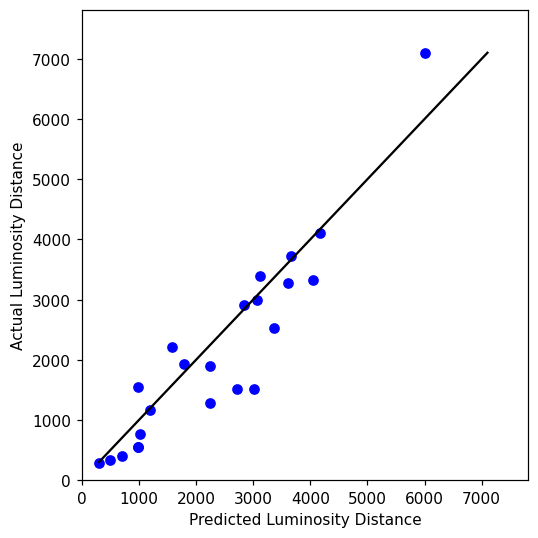

In [2005]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

ax.scatter(y_test_pred, y_test, color="blue")

min_test = [min(y_test), min(y_test_pred)]
max_test = [max(y_test), max(y_test_pred)]
x = np.linspace(max(min_test), max(max_test), 100)
ax.plot(x,x, color = "black", label = "$\\{m_1} = \\{m_2}$")

ax.set_xlim(0, max(max_test) * 1.1)
ax.set_ylim(0, max(max_test) * 1.1)

ax.set_xlabel("Predicted Luminosity Distance")
ax.set_ylabel("Actual Luminosity Distance")

plt.tight_layout()
plt.show()

Graph gives a sense of the spread of the predictions.

The spread seems resonable given just how little data there is, but obviously it's not ideal. Overall, I'm very supprised with how accurate the model is. Since it's not just spitting out random predictions there must be some relation between mass 1, mass 2, snr, far, and/or chirp mass. Unfortunitly, it seems random forest may not be able to cature this relationship that well given running it multiple times seems to get an R2 score between 0.80 and 0.90 which is not ideal.

There are a few ways to improve model preformance, but for now I want to get a sense of how well other machine learning and statistical algorthms can prefrom at this task.

Since unlike random forest, some algorthms are sensitive to unnormalized data, I will also be **normalizing** X.

In [2006]:
X_scaler = MinMaxScaler()
X_norm = X_scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y_norm = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.20)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [2007]:
# this method will automatically produce the above graph to compare various algorthm's performances
def visualize_preformance(nrows, ncolumns, figsize, models, model_names, model_colors, left_index, right_index):
    fig, ax = plt.subplots(nrows, ncolumns, figsize=figsize, dpi = 110)
    
    for model, name, color, li, ri in zip(models, model_names, model_colors, left_index, right_index):
        model.fit(X_train, y_train)

        y_test_scaled = y_scaler.inverse_transform(y_test.reshape(-1, 1))
        y_test_pred_unscaled = model.predict(X_test).reshape(-1, 1)
        y_test_pred = y_scaler.inverse_transform(y_test_pred_unscaled)

        r2_score = sm.r2_score(y_test, y_test_pred_unscaled)

        # graphing results
        ax[li, ri].set_title(name)

        ax[li, ri].scatter(y_test_pred, y_test_scaled, color=color)

        ax[li, ri].legend([f'r2 : {r2_score:.2f}'], loc='lower right')

        min_test = [min(y_test_scaled), min(y_test_pred)]
        max_test = [max(y_test_scaled), max(y_test_pred)]
        x = np.linspace(min(min_test), max(max_test), 100)
        ax[li, ri].plot(x,x, color = "black")

        ax[li, ri].set_xlim(0, max(max_test) * 1.1)
        ax[li, ri].set_ylim(0, max(max_test) * 1.1)

        ax[li, ri].set_xlabel("Predicted")
        ax[li, ri].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

In [2008]:
# defining models

rf = RandomForestRegressor(n_estimators = 10,
                           min_samples_split = 3,
                           max_features = "sqrt",
                           bootstrap = True)

svr = SVR()

br = BayesianRidge()

lin_reg = LinearRegression()

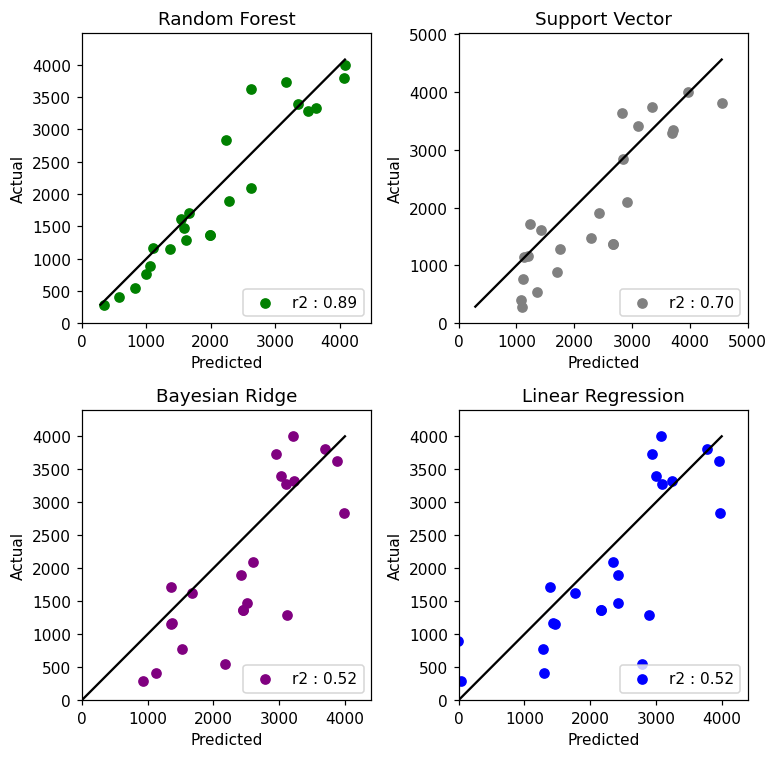

In [2009]:
models = [rf, svr, br, lin_reg]
model_names = ["Random Forest", "Support Vector", "Bayesian Ridge", "Linear Regression"]
model_colors = ["green", "gray", "purple", "blue"]
left_index = [0, 0, 1, 1]
right_index = [0, 1, 0, 1]
visualize_preformance(2, 2, (7, 7), models, model_names, model_colors, left_index, right_index)

Unsuprisingly, Random Forest and Support Vector regression are clearly better. Additionally, give that the preformance of Bayesian Ridge and Linear Regression is so poor it's very likely that the relationship between luminosity distance and the values used to predict it (snr, far, chirp_mass, total_mass, and mass_ratio) is **non-linear**, because Bayesian Ridge and Linear Regression are linear models.

In [2010]:
# TODO : analyze trees in random forest to get an idea of what variables are being used to predict luminosity distance

In [2011]:
# TODO : graphically show how the random forest is predicting luminosity distance

In [2012]:
# TODO : create and test a random forest-support vector ensemble model (average voting?)

In [ ]:
# TODO : apply ensemble model to predict O4 luminosity distance

In [ ]:
# TODO : find a way to determine the accuarcy of the O4 predictions